
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer




# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [99]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target


The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [100]:
# part A
X.shape
print pd.DataFrame(X)[:5]
# the feature matrix has 506 rows and 13 columns

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [101]:
# part b
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X,y)
print reg.coef_
y_predict = reg.predict(X)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_predict))

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
Mean squared error: 21.90


In [102]:
# part c
train_x = X[:400]
train_y = y[:400]
test_x = X[400:]
test_y = y[400:]
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
y_train_predict= reg.predict(train_x)
y_test_predict = reg.predict(test_x)
print("Mean squared error: %.2f"
      % mean_squared_error(train_y, y_train_predict))
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_test_predict))

Mean squared error: 22.31
Mean squared error: 38.16


For training set, we have a MSE value of 22.31; for testing set, we have a MSE value of 38.16.This is also reasonable because we build our model based on the traing data set.

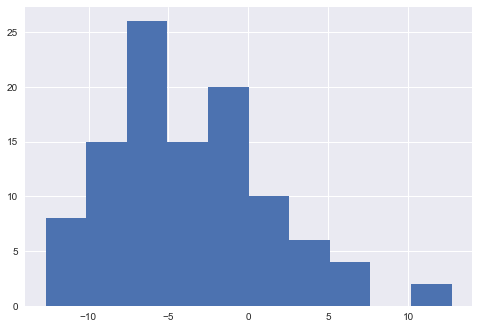

In [103]:
# part d
# we know that residual equals y-expected y, so we plot a histogram of (y- y hat)
import matplotlib.pyplot as plt
residual = test_y - y_test_predict
plt.hist(residual)
plt.show()

The residuals do not appear to be centered around zero, as one would expect this might not be a good linear regression fit. They are also skewed toward the right which means the residuals do not exactly follow a normal distribution. And since residuals are not normally distributed, the model is therefore not ideal. So we might want to try something else to see if there is a better model.

In [104]:
# Part e
X = np.concatenate((X, np.square(X)), axis=1)

In [107]:
train_x = X[:400]
train_y = y[:400]
test_x = X[400:]
test_y = y[400:]
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
y_train_predict= reg.predict(train_x)
y_test_predict = reg.predict(test_x)
print("Mean squared error: %.2f"
      % mean_squared_error(train_y, y_train_predict))
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_test_predict))

Mean squared error: 14.47
Mean squared error: 32.95


For training set, we have a MSE value of 14.47; for testing set, we have a MSE value of 32.95. By adding square terms of each variable to the data, we reduce the mean squared error for both training and testing sets.

## Answer



# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



Automatically created module for IPython interactive environment


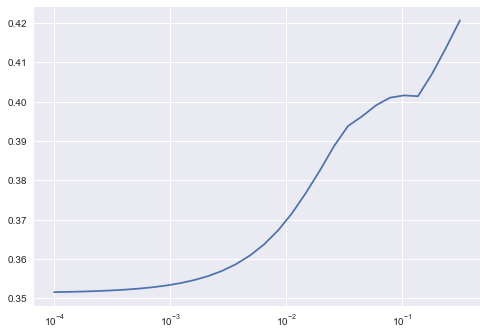

{'alpha': 0.31622776601683794}

In [136]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

boston = datasets.load_boston()
X = boston.data
y = boston.target

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf_lasso.fit(X, y)
lasso_scores = clf_lasso.cv_results_['mean_test_score']
scores_std = clf_lasso.cv_results_['std_test_score']
plt.semilogx(alphas, lasso_scores)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.show()
clf_lasso.best_params_ 


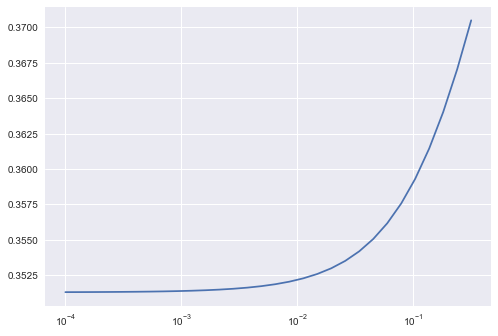

{'alpha': 0.31622776601683794}

In [191]:
ridge = Ridge(random_state=0)
clf_ridge = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
clf_ridge.fit(X, y)
ridge_scores = clf_ridge.cv_results_['mean_test_score']
scores_std = clf_ridge.cv_results_['std_test_score']
plt.semilogx(alphas, ridge_scores)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.show()
clf_ridge.best_params_ 


In [151]:
lasso_alpha = alphas[np.argmin(lasso_scores)]
ridge_alpha = alphas[np.argmin(ridge_scores)]
print ('best lambda for lasso:',lasso_alpha)
print ('best lambda for ridge:',ridge_alpha)

best lambda for lasso: 0.0001
best lambda for ridge: 0.0001


In [172]:
# Create empty data frame to store the coefficients for each value of alpha/lambda
data_X =pd.DataFrame(X)
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = data_X.columns.values)

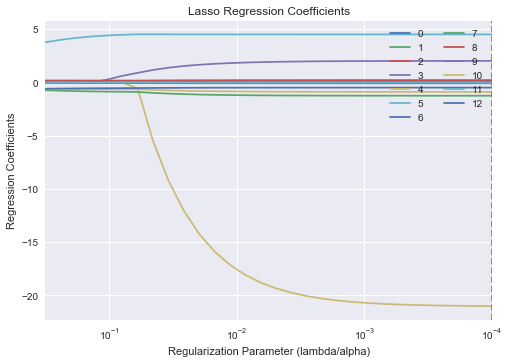

In [190]:
# Lasso Regression

## Initialize lasso model 
lasso = linear_model.Lasso()
## Initialize dataframe to store lasso coefficients
lasso_coefs = df_coefs
## Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    lasso.alpha = alpha
    lasso.fit(X_train, y_train)
    lasso_coefs.loc[alpha] = lasso.coef_

## Plot alpha vs. the value of each coefficients
lasso_coefs.plot(logx=True)
legend(loc=1, ncol=2)
xlim([alphas[-1], alphas[0]])
title('Lasso Regression Coefficients')
xlabel('Regularization Parameter (lambda/alpha)')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
plt.axvline(lasso_alpha, linestyle='--', color='.5')
plt.show()

In [198]:
# Create empty data frame to store the coefficients for each value of alpha/lambda
data_X =pd.DataFrame(X)
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = data_X.columns.values)

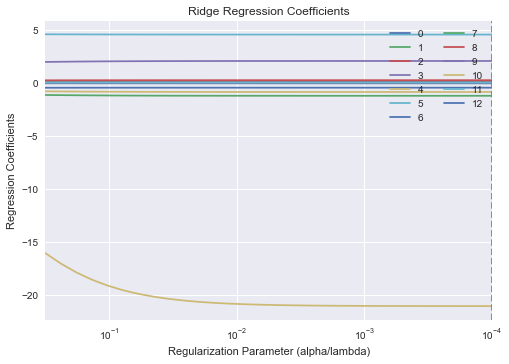

In [199]:
# Ridge Regression

## Initialize ridge model
ridge = linear_model.Ridge()
## Initialize dataframe to store ridge coefficients
ridge_coefs = df_coefs
## Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    ridge.alpha = alpha
    ridge.fit(X_train, y_train)
    ridge_coefs.loc[alpha] = ridge.coef_

## Plot alpha vs. the value of each coefficients

ridge_coefs.plot(logx=True)
legend(loc=1, ncol=2)
xlim([alphas[-1], alphas[0]])
title('Ridge Regression Coefficients')
xlabel('Regularization Parameter (alpha/lambda)')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
plt.axvline(ridge_alpha, linestyle='--', color='.5')
plt.show()

In [204]:
# Least Squares
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
linear_MSE = np.mean((linear_pred - y_test)**2)

# Lasso
lasso = linear_model.Lasso(alpha = lasso_alpha)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_MSE = np.mean((lasso_pred - y_test)**2)

# Ridge
ridge = linear_model.Ridge(alpha = ridge_alpha)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_MSE = np.mean((ridge_pred - y_test)**2)

print ('Out of Sample MSE:')
print
print ('Linear Regression :', linear_MSE)
print ('Lasso Regression  :', lasso_MSE)
print ('Ridge Regression  :', ridge_MSE)

Out of Sample MSE:
Linear Regression : 24.5894595553
Lasso Regression  : 24.5879284584
Ridge Regression  : 24.5893464335


In [206]:
lassoCV = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lassoCV.fit(X_train, y_train)
lassoCV_pred = lassoCV.predict(X_test)
lassoCV_MSE = np.mean((lassoCV_pred - y_test)**2)

print ('Best Regularization Parameter (based on cross-validation):', lassoCV.alpha_, '(10^%f)' % math.log10(lassoCV.alpha_))


Best Regularization Parameter (based on cross-validation): 0.718874102209 (10^-0.143347)


In [207]:
bestLasso_coefs = pd.Series(lassoCV.coef_, index = df_coefs.columns.values)
bestLasso_coefs.sort_values(ascending=False)

5     2.548846
8     0.190544
1     0.028380
6     0.025288
11    0.009230
4    -0.000000
3     0.000000
2    -0.000000
9    -0.013592
0    -0.028409
7    -0.490980
10   -0.574313
12   -0.663865
dtype: float64

The best regularization parameter based on the cross-validation results is approximately $10^{-0.143347}$. The corresponding lasso regression coefficients are shown above. When this shrinkage parameter is used, some coefficients are either shrunk to zero or close to zero. In this case, only the following column numbers remain non-zero: 5,8,1,6,11,9,0,7,10,12.

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

